In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
dataframe = pd.read_excel("fitur_sleep apnea_new.xlsx")
dataframe

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,61.988434,66.739234,37.287305,25.208146,13.071895,0.047852,0.156250,3.991849,26.365073,90.528083,3.433637,0
1,61.034338,64.759546,27.137156,15.567681,4.318937,0.050781,0.208008,1.425610,19.187702,89.465861,4.662667,0
2,62.197873,59.342001,22.237062,13.833781,1.633987,0.040039,0.206055,5.570459,15.723902,82.417077,5.241515,0
3,79.359220,79.904832,23.852859,17.066708,3.856041,0.041016,0.244141,5.474522,16.866475,111.719417,6.623756,0
4,64.358701,210.089646,334.969189,246.958481,58.940397,0.046875,0.343750,0.067304,236.856429,177.255451,0.748367,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2478,69.871190,75.899456,51.828513,40.749231,18.895349,0.048828,0.214844,3.312378,36.647013,100.487819,2.742047,1
2479,68.648516,69.733570,49.676713,37.309694,20.058997,0.047852,0.285156,4.220319,35.126685,92.141949,2.623133,1
2480,70.403406,125.103457,63.853657,51.939619,21.929825,0.041016,0.150391,11.144974,45.151350,171.063997,3.788680,1
2481,72.088870,219.462622,137.955321,122.774515,29.705882,0.040039,0.161133,2.849444,97.549088,294.615257,3.020174,1


In [3]:
# X = dataframe[["SDNN", "SD2", "RMSSD", "SD1", "SDSD", "pNN50", "LF", "HR"]]
X = dataframe[["SDNN", "SD2", "RMSSD", "SD1", "SDSD", "pNN50"]]
num_feature = len(X.columns)

y = dataframe["Label"]

In [4]:
smote = SMOTE(random_state=42)
data_resampled, labels_resampled = smote.fit_resample(X, y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data_resampled, labels_resampled, test_size=0.1, shuffle=True
)

In [6]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(units=32, input_shape=(num_feature,), activation="relu"),
        tf.keras.layers.Dense(units=256, activation="relu"),
        tf.keras.layers.Dense(units=128, activation="relu"),
        tf.keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

c:\Users\ASUS\anaconda3\envs\cuda-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)


history = model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.2)

Epoch 1/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6268 - loss: 0.8350 - val_accuracy: 0.6214 - val_loss: 0.6706
Epoch 2/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6000 - loss: 0.6960 - val_accuracy: 0.6089 - val_loss: 0.6395
Epoch 3/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6290 - loss: 0.6579 - val_accuracy: 0.6268 - val_loss: 0.6295
Epoch 4/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6559 - loss: 0.6242 - val_accuracy: 0.6179 - val_loss: 0.6253
Epoch 5/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6418 - loss: 0.6321 - val_accuracy: 0.6071 - val_loss: 0.6309
Epoch 6/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6412 - loss: 0.6281 - val_accuracy: 0.6250 - val_loss: 0.6243
Epoch 7/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6329 - loss: 0.6318 - val_accuracy: 0.6214 - val_loss: 0.6209
Epoch 8/1000
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6540 - loss: 0.6158 - 

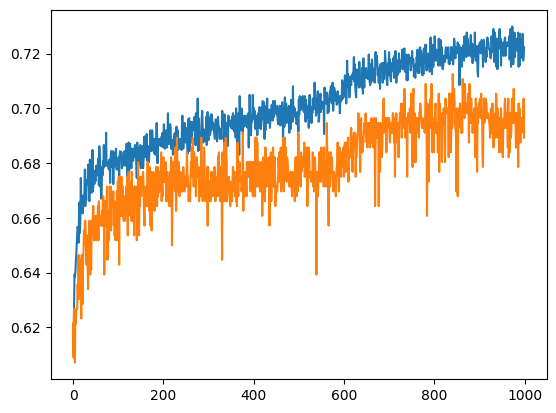

In [8]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print(f"Accuracy: {accuracy:.4f}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7796 - loss: 0.4950  
Loss: 0.5086625814437866
Accuracy: 0.7660


In [10]:
X_test

,SDNN,SD2,RMSSD,SD1,SDSD,pNN50
659,57.809736,73.386144,50.909365,35.998253,48.066547,3.293413
1050,27.849086,37.587997,16.199576,11.454422,9.420702,0.000000
2047,225.540894,309.226404,105.939286,74.909373,83.527327,40.808824
2031,160.519616,205.426584,134.373956,95.014180,108.970718,52.000000
2142,227.395293,293.340059,186.373519,131.785978,178.493884,20.118343
...,...,...,...,...,...,...
1186,40.510374,56.121850,15.445089,10.921249,10.570031,0.615385
2990,86.197789,109.379603,75.160088,53.145875,43.420535,54.017726
731,62.105925,83.727605,36.363931,25.711672,21.923331,18.241042
721,91.587444,126.225904,36.000886,25.451639,23.680548,14.765101


In [11]:
prediction = model.predict(X_test)
predicted_labels = (prediction > 0.5).astype(int)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


Text(113.9222222222222, 0.5, 'predicted class')

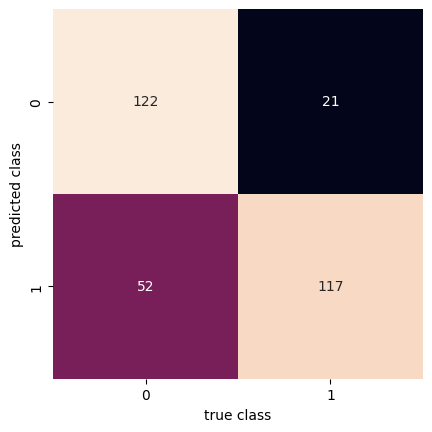

In [12]:
conmat = confusion_matrix(y_test, predicted_labels)
sns.heatmap(conmat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true class")
plt.ylabel("predicted class")